### Project4_UnSupervised_Learning_Object_Recognition

In [67]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
%matplotlib inline

### Load Dataset

Data Description:  
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

In [68]:
data_vec = pd.read_csv("vehicle.csv")

In [69]:
data_vec.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


### EDA

In [70]:
data_vec.info()
# class is object variable i.e Van, car

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [71]:
#data_vec.dtypes
data_vec.shape

## 846 rows, 19 columns

(846, 19)

### Univariate Analysis

In [72]:
# 5-point summary
data_vec.describe().transpose()#summary statistics

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


## scaled_variance.1 has very High deviation - 176
## radius_ratio has medium deviation - 33
Here 50% quantile also known as median, we use median because the median cannot be affected by outliers. Where mean is easily affected by outliers.

### Target Column Distribution

In [73]:
data_vec['class'].value_counts(normalize = True)

car    0.507092
bus    0.257683
van    0.235225
Name: class, dtype: float64

It has class imbalance as Datset has 50% Car

In [74]:
data_vec.groupby("class").agg({'class': 'count'})

,class
class,
bus,218
car,429
van,199


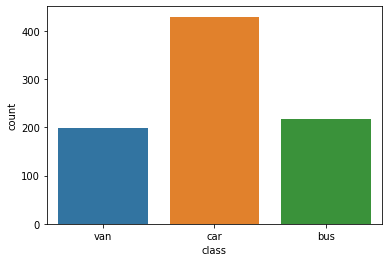

In [75]:
sns.countplot(data_vec['class']) ## visual values of classification

C:\Users\Public\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Public\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Histogram of hollows_ratio')

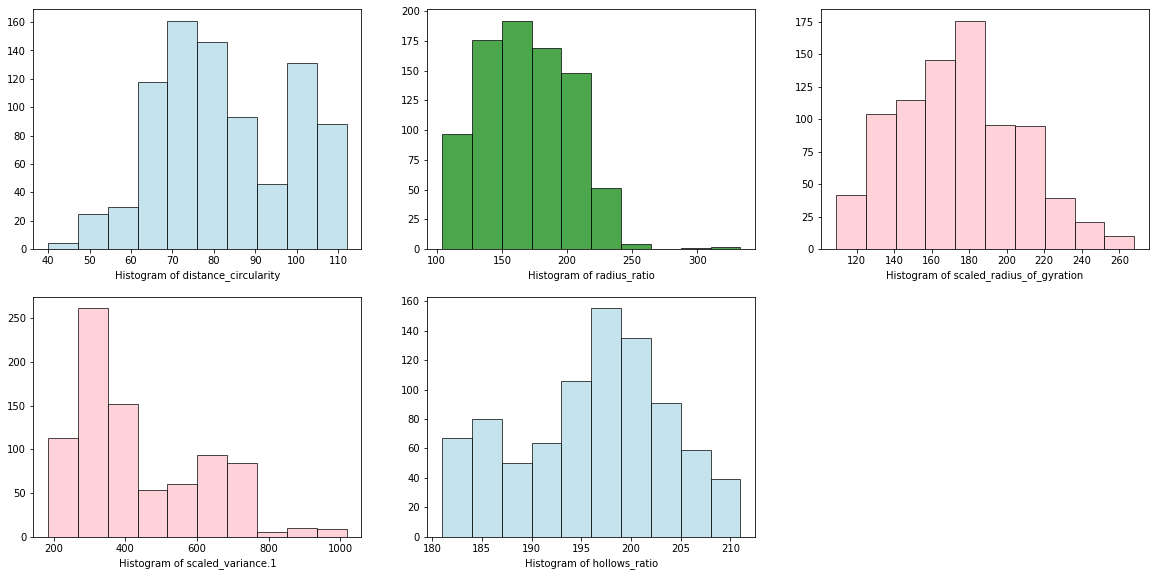

In [76]:
#Distribution of distance_circularity,radius_ratio,scaled_radius_of_gyration,scaled_variance.1,hollows_ratio
#Data Visualisation

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data_vec["distance_circularity"].dropna(), color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Histogram of distance_circularity')

plt.subplot(3,3,2)
plt.hist(data_vec["radius_ratio"].dropna(), color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Histogram of radius_ratio')

plt.subplot(3,3,3)
plt.hist(data_vec["scaled_radius_of_gyration"], color='pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Histogram of scaled_radius_of_gyration')

plt.subplot(3,3,4)
plt.hist(data_vec["scaled_variance.1"], color='pink', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Histogram of scaled_variance.1')

plt.subplot(3,3,5)
plt.hist(data_vec["hollows_ratio"].dropna(), color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Histogram of hollows_ratio')

1. radius_ratio and scaled_variance are right-skewed
2. hollows_ration is close to Normal distribution
3. distance_circularity is left skewed

### Bivariate and MultiVariate analysis with correlation

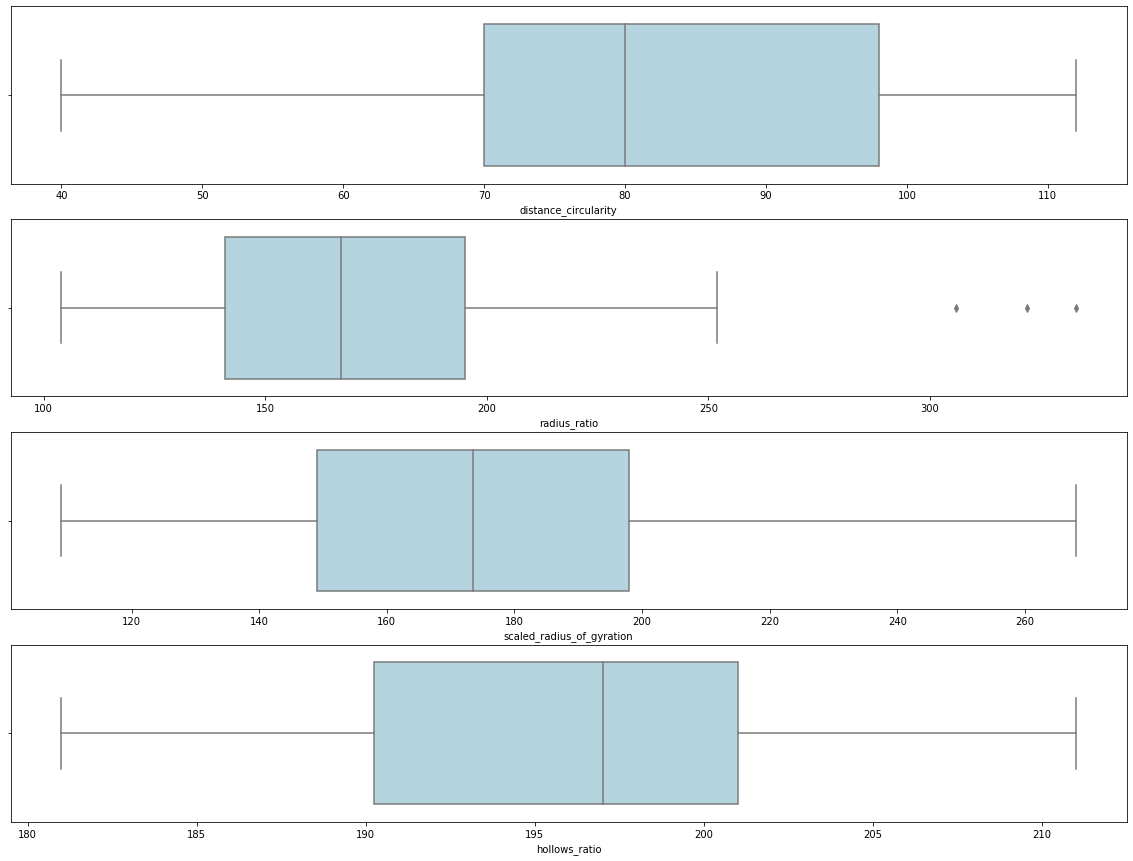

In [77]:
#Checking the presence of outliers in distance_circularity,radius_ratio,scaled_radius_of_gyration,hollows_ratio
#Checking for the outliers

plt.figure(figsize= (20,15))
plt.subplot(4,1,1)
sns.boxplot(x= data_vec["distance_circularity"], color='lightblue')

plt.subplot(4,1,2)
sns.boxplot(x= data_vec["radius_ratio"], color='lightblue')

plt.subplot(4,1,3)
sns.boxplot(x= data_vec["scaled_radius_of_gyration"], color='lightblue')

plt.subplot(4,1,4)
sns.boxplot(x= data_vec["hollows_ratio"], color='lightblue')

### Radius ratio has outliers which may impact overfitting issue.

Determining the skeweness of a data from its box plot

The side of the bigger segment tells us how the data is skewed
If both segments are equal, then it is a symmetric distribution

The rule that box plot follows to decide what should be an outlier is that "any point greater than Q3 + 1.5IQR or lesser than Q1 - 1.5IQR is an outlier "

### Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points) 

### Covariance

In [78]:
data_vec.cov() # Prints the covariance of each attribute against every other attribute

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,67.806566,34.826568,102.873485,191.090053,5.966180,5.616954,222.283373,-50.788816,17.403221,80.818554,197.643975,1188.347246,157.194517,-15.452203,9.583884,11.588006,15.141222,22.391727
circularity,34.826568,37.849219,77.300169,128.903181,7.477547,7.132195,173.947666,-39.663817,13.543297,86.159435,154.535080,915.160061,186.365065,2.438638,4.400113,-0.653087,-4.015763,2.080131
distance_circularity,102.873485,77.300169,248.954492,408.136464,19.793342,19.251798,475.382191,-112.738057,36.692318,177.845678,428.991972,2482.271343,363.818343,-26.803519,8.890164,37.553839,14.180055,39.071125
radius_ratio,191.090053,128.903181,408.136464,1123.603672,176.366880,69.658511,820.885053,-207.789605,61.893129,277.944988,840.543459,4284.944338,588.849710,-45.646171,8.096073,52.287608,79.179190,117.928597
pr.axis_aspect_ratio,5.966180,7.477547,19.793342,176.366880,62.275189,23.582590,27.233937,-11.324060,1.629509,14.579745,67.974864,125.239919,31.475980,9.057884,-2.279007,-2.269993,11.672271,15.734830
max.length_aspect_ratio,5.616954,7.132195,19.251798,69.658511,23.582590,21.171195,25.379555,-6.478819,1.931323,20.433808,46.180182,116.960040,28.475928,10.205398,0.350800,1.789181,-0.741957,4.925981
scatter_ratio,222.283373,173.947666,475.382191,820.885053,27.233937,25.379555,1103.226122,-252.311475,85.410974,389.967481,991.721404,5841.901215,866.583433,-6.979511,12.180870,63.332791,1.057457,29.283341
elongatedness,-50.788816,-39.663817,-112.738057,-207.789605,-11.324060,-6.478819,-252.311475,61.092759,-19.280532,-88.040213,-230.523503,-1321.174999,-195.446237,6.073001,-2.008015,-12.985047,-5.526606,-12.608151
pr.axis_rectangularity,17.403221,13.543297,36.692318,61.893129,1.629509,1.931323,85.410974,-19.280532,6.723302,30.595678,76.389591,454.619753,67.545033,-0.305528,1.064246,4.987437,-0.303837,1.916639
max.length_rectangularity,80.818554,86.159435,177.845678,277.944988,14.579745,20.433808,389.967481,-88.040213,30.595678,210.704141,340.383795,2043.755382,410.295756,4.489876,9.730402,0.215225,-9.321171,8.289506


### Correlation

In [79]:
data_vec.corr()  # prints the correlation coefficient between every pair of attributes

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,0.764361,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,0.806791,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,0.865710,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,0.798294,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,0.273738,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,0.319033,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,0.951672,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504
elongatedness,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,-0.938313,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,0.938182,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,0.746657,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770


1. circularity and distance_circularity are highly correlated
2. elongatedness and compactness are uncorrelated with high margin

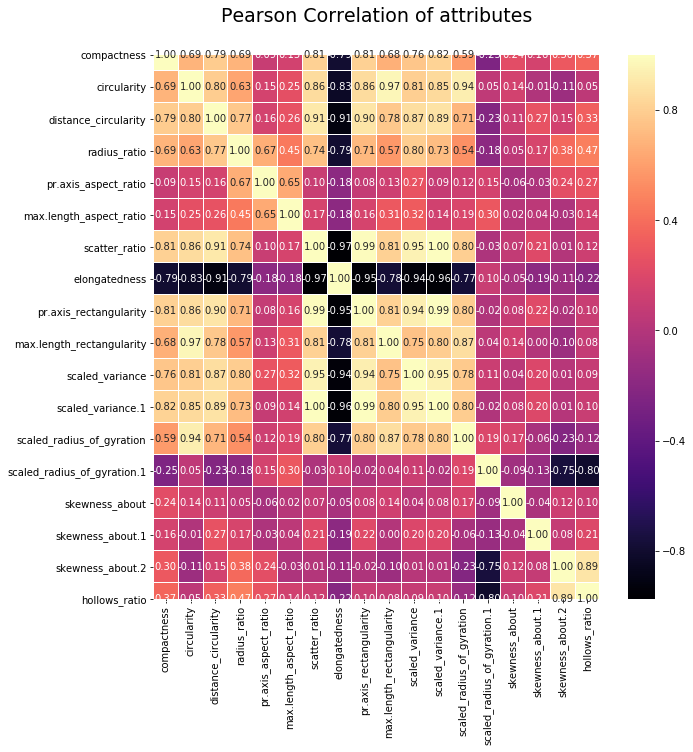

In [80]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(data_vec.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

#There are strong correlation between many two variables like compactness, radius_ratio
#circularity are highly correlated with 4 of each other
#Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
#skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
#ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
      

### We can drop one feature if both are highly correlated then there is no point using both features.SNS heatmap gives us the correlation matrix where we can see which features are highly correlated.

From above correlation matrix we can see that there are many features which are highly correlated. if we carefully analyse, we will find that many features are there which having more than 0.9 correlation. so we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:

max.length_rectangularity
scaled_radius_of_gyration
skewness_about.2
scatter_ratio
elongatedness
pr.axis_rectangularity
scaled_variance
scaled_variance.1
Outcome:
Also we observed that more than 50 % of our attributes ar highly correlated , so what we can we do best to deal with this kind problem of Multicollinearity.

1.Scaled Variance & Scaled Variance.1 are having strong positive correlation , so we can pick one and drop one as they will only make our dimension redundant.
2.Similarly between elongatedness and pr.axis_rectangularity we can pick one as they have very strong negative correlation. This approach can be used to select the feature we want to carry forward for model analysis.3. We can use Feature selection - K-Best feature but we will use dimension reduction algorithm called Principle Component Analysis (PCA).

### Skewness:-

Positively skewed: Most frequent values are low and tail is towards high values.

Negatively skewed: Most frequent values are high and tail is towards low values.

If Mode< Median< Mean then the distribution is positively skewed.

If Mode> Median> Mean then the distribution is negatively skewed.

In [92]:
data_vec.skew()

compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


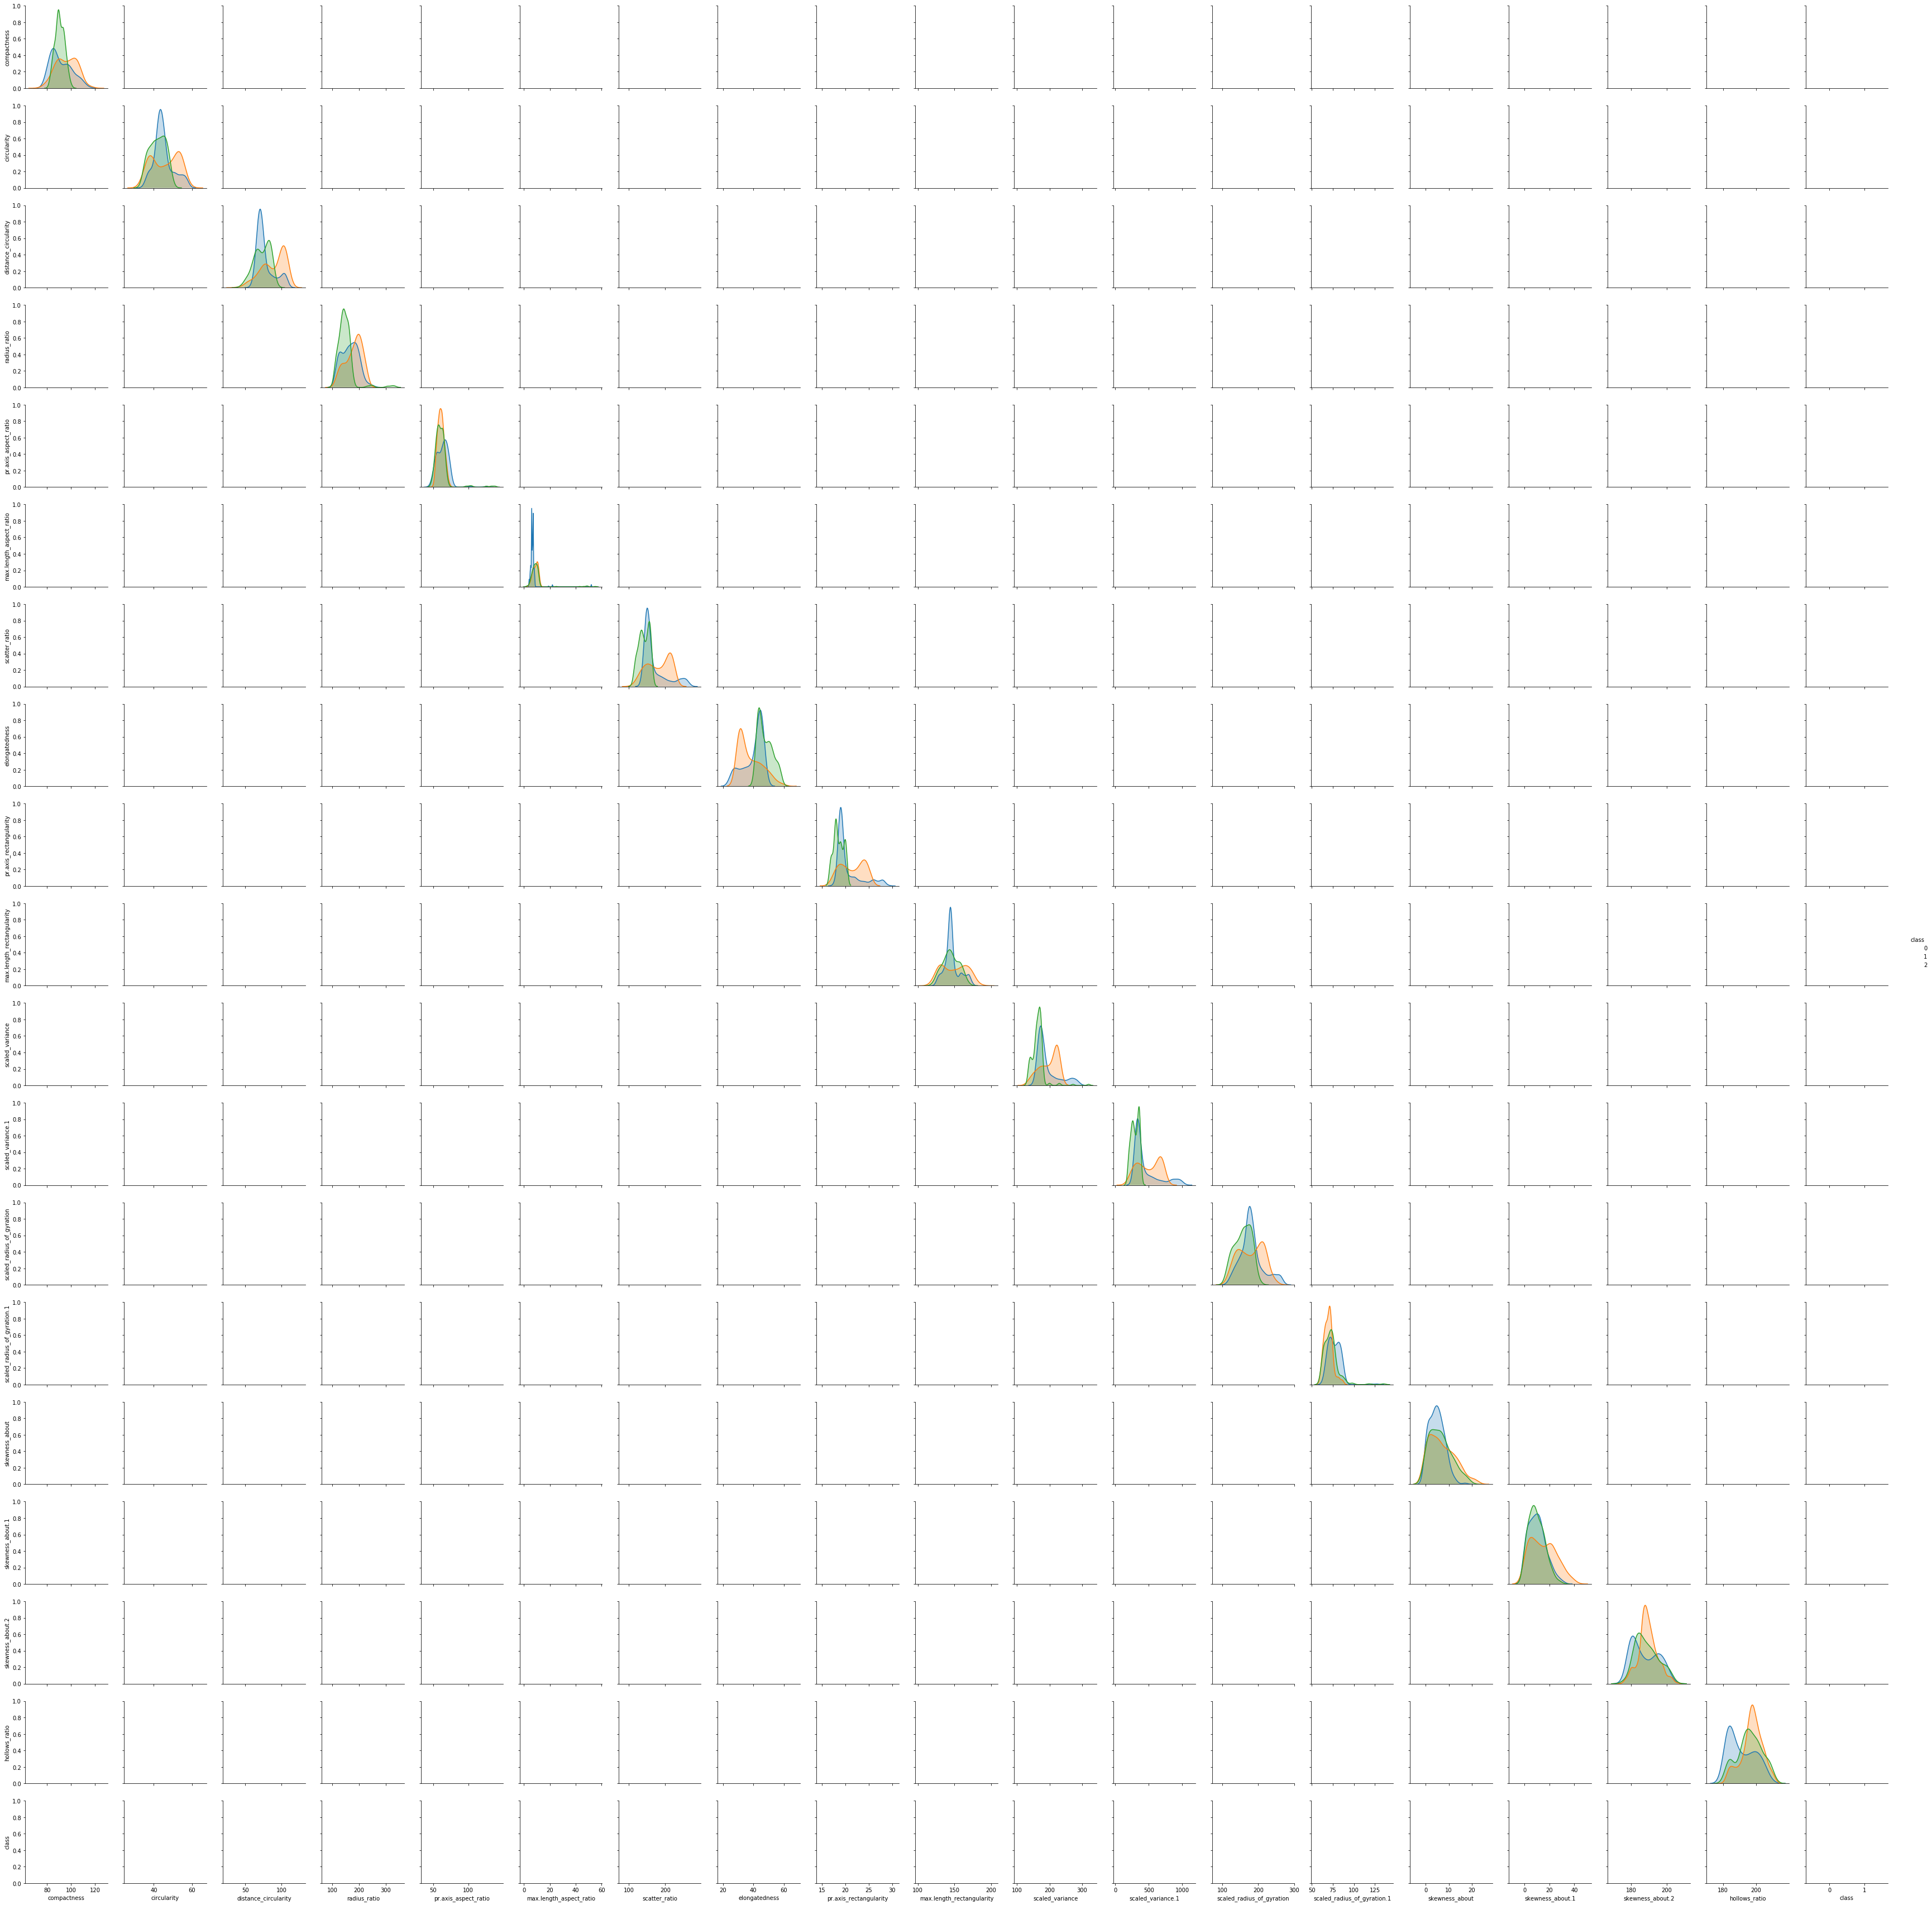

In [93]:
## multivariate analysis
sns.pairplot(data = data_vec,hue = 'class',kind = 'kde')

### Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks) 

In [94]:
##Identify duplicates records in the data
dupes = data_vec.duplicated()
sum(dupes)

0

### One Hot Encoding

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
columns = data_vec.columns
#Let's Label Encode our class variable: 
print(columns)
data_vec['class'] = le.fit_transform(data_vec['class'])
data_vec.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

Data Cleaning and getting rid of missing values

In [96]:
## Data Cleaning
# Making a list of missing value types
missing_values = ["n/a", "na", "--", "?",'NA']
data_vec_missing = pd.read_csv("vehicle.csv", na_values = missing_values) #df => dataframe
type(data_vec_missing) #pandas.core.frame.DataFrame
print(data_vec_missing.shape) # shape=> rows,columns
data_vec_missing.head() #inspecting first 5 rows

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [97]:
#Data cleaning
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( data_vec.isna().sum(), columns= ['Number of missing values'])

,Number of missing values
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


In [98]:
#Check for the null values 
data_vec.isnull().apply(pd.value_counts)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
False,846.0,841,842,840,844,846.0,845,845,843,846.0,843,844,844,842,840,845,845,846.0,846.0
True,NaN,5,4,6,2,NaN,1,1,3,NaN,3,2,2,4,6,1,1,NaN,NaN


In [99]:
data_vec.isnull().sum().sum()  # Total number of recognised missing values in the entire dataframe

41

### Data Imputation

In [100]:
# Replacing NaN with a custom value
# Replace NaN values with the median of the column
# Data['circularity'].fillna(Data.Number.median(), inplace = True)

newvehdf = data_vec.copy()

X = newvehdf.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute. 

imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newvehdf = pd.DataFrame(transformed_values, columns = column )
newvehdf.describe()


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388,0.977541
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797,0.702130
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,1.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [101]:
newvehdf.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,2.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,2.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,2.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0
5,107.0,44.0,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,0.0
6,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204.0,0.0
7,90.0,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202.0,2.0
8,86.0,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208.0,2.0
9,93.0,44.0,98.0,167.0,62.0,11.0,183.0,36.0,22.0,146.0,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204.0,1.0


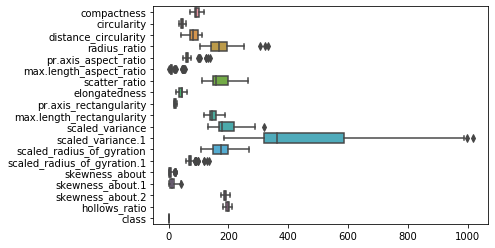

In [102]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers

ax = sns.boxplot(data=newvehdf, orient="h")

### Data preprocessing  - Feature scaling for PCA
The idea behind Standard Scaler is that it will transform your data, such that the distribution will have a mean value of 0 and a standard deviation of 1.

In [103]:
## Using standardscaler 
#data_vec_scaled = (x — u) / s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(transformed_values)

### Split the data into training and test set in the ratio of 70:30 respectively

In [106]:
#X = data_vec.drop('Class',axis=1)     # Predictor feature columns (18 X m)
Y = newvehdf['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.shape

(592, 19)

In [107]:
# check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(newvehdf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(newvehdf.index)) * 100))

69.98% data is in training set
30.02% data is in test set


### Train a Support vector machine using the train set and get the accuracy on the test set (10 marks) 

In [118]:
from sklearn.svm import SVC

svc_model = SVC(C=100)
clf = svc_model.fit(x_train, y_train)

print("Accuracy on training set: {:.2f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.99


### Perform K-fold cross validation and get the cross validation score of the model 

In [121]:
kfold = model_selection.KFold(n_splits=10, random_state=12345)
cv_results = model_selection.cross_val_score(svc_model, x_train, y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean())

0.9983050847457626


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data 

In [124]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(newvehdf)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [125]:
pca.components_.shape

(19, 19)

Text(0.5, 1.0, 'Explained Variance')

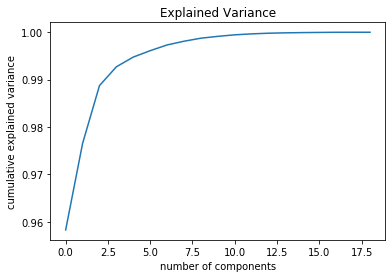

In [127]:
# choose PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Explained Variance')

## we have flat curve at component = 10, so we will take 10 features/components

In [128]:
## using 10 components train-test split
pca = PCA(n_components = 10)
pca.fit(x_train)

## It will give eigen values
print(pca.explained_variance_)

x_train_pca = pca.transform(x_train)
print("original shape:   ", x_train.shape)
print("transformed shape:", x_train_pca.shape)

x_test_pca = pca.transform(x_test)
print("original shape:   ", x_test.shape)
print("transformed shape:", x_test_pca.shape)


[9.62382142 3.19709827 1.34141945 1.27861698 1.05848743 0.82135564
 0.41802477 0.26143101 0.21658725 0.12643394]
original shape:    (592, 19)
transformed shape: (592, 10)
original shape:    (254, 19)
transformed shape: (254, 10)


In [131]:
from sklearn.svm import SVC

svc_model = SVC(C=100)
kfold = model_selection.KFold(n_splits=10, random_state=12345)
cv_results = model_selection.cross_val_score(svc_model, x_train_pca, y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean())

0.9983050847457626


### Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

In [134]:
svc_model.fit(x_train, y_train)
print ('Before PCA score', svc_model.score(x_test, y_test))

svc_model.fit(x_train_pca, y_train)
print ('After PCA score', svc_model.score(x_test_pca, y_test))

Before PCA score 0.9881889763779528
After PCA score 0.9881889763779528


Before PCA cross validation score 0.998305
After PCA cross validation score 0.9983050847457626

### Comment :-We observed how Principal component analysis  pick only the relevant features by analysing the relationship between independent attributes to see which one will be more helpful in building our model without introducing any impurity in it. 
- We can increase the models performance both in terms of processing speed and the ease of implementing it . 
- Here we are gettting almost same score, as SVM model was overfitting.
- Tried with scaling also, but still we get accuracy almost 1. Need to remove outliers.